In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Iris dataset directly from Scikit-learn
iris = load_iris()

# Convert to DataFrame for readability
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["species"] = iris.target

# Map numeric species to names
data["species"] = data["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

print("✅ Dataset Loaded Successfully!")
data.head()



✅ Dataset Loaded Successfully!


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Features and target
X = data.drop("species", axis=1)
y = data["species"]

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


In [4]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Train the model
model.fit(X_train, y_train)

print("🌳 Model training complete!")


🌳 Model training complete!


In [5]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy*100:.2f}%")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Model Accuracy: 100.00%

📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



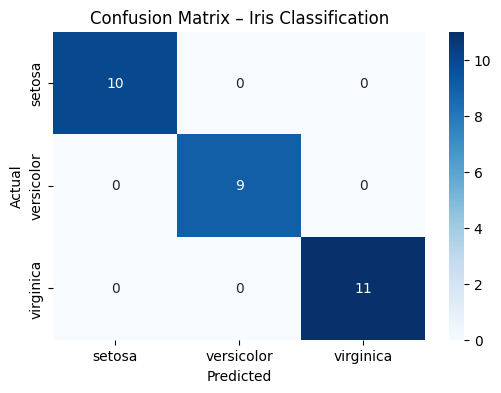

In [6]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix – Iris Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
# Save predictions for reporting
results = X_test.copy()
results["Actual"] = y_test.values
results["Predicted"] = y_pred
results.to_csv("iris_predictions.csv", index=False)

print("💾 Predictions saved to iris_predictions.csv")


💾 Predictions saved to iris_predictions.csv
